<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Classical%20Mechanics/Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical Mechanics: Essential Numerical Techniques


### Learning Objectives:
After completing this notebook, students will be able to:
- Apply numerical differentiation to analyze kinematics data

### Prerequisites:
- Basic Python programming (variables, functions, loops)
- Introductory classical mechanics (Newton's laws, energy, oscillations)
- Calculus (derivatives, integrals)



In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import fsolve
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters for publication-quality figures
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['grid.alpha'] = 0.3

# NUMERICAL DIFFERENTIATION


MOTIVATION FROM PHYSICS:

In physics, we often measure position as a function of time and need
to determine velocity and acceleration. Real data contains noise, making analytical differentiation impossible. Numerical differentiation allows us to extract meaningful kinematic information from experimental measurements.

KEY CONCEPTS:
- Forward difference approximation
- Step size selection and trade-offs
- Noise amplification in differentiation
- Applications to kinematics and experimental data

In [ ]:
# Forward Difference Method
def forward_difference(x, y):
    """
    Calculate derivative using forward difference method.

    Parameters:
    x (array): Independent variable values
    y (array): Dependent variable values

    Returns:
    x_deriv (array): x values for derivative (length n-1)
    dy_dx (array): Derivative values using forward difference
    """
    # Calculate step sizes (handle non-uniform spacing)
    dx = np.diff(x)
    dy = np.diff(y)

    # Forward difference: f'(x_i) ≈ [f(x_{i+1}) - f(x_i)] / [x_{i+1} - x_i]
    dy_dx = dy / dx

    # x values correspond to the left point of each interval
    x_deriv = x[:-1]

    return x_deriv, dy_dx

Let's put this in practice using a simple function

In [ ]:
# Example usage of forward_difference
x_simple = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
y_simple = np.array([0.0, 1.0, 4.0, 9.0, 16.0]) # y = x^2

x_deriv_simple, dy_dx_simple = forward_difference(x_simple, y_simple)

print("x values for derivative:", x_deriv_simple)
print("Numerical derivative (dy/dx):", dy_dx_simple)

# Expected analytical derivative for y = x^2 is dy/dx = 2x
# At x_deriv_simple = [0.0, 1.0, 2.0, 3.0], the analytical values are [0.0, 2.0, 4.0, 6.0]
# The forward difference approximates the derivative at the left point of the interval.
# So, for the interval [0, 1], the derivative is approx (1-0)/(1-0) = 1, corresponding to x=0.
# For the interval [1, 2], the derivative is approx (4-1)/(2-1) = 3, corresponding to x=1.
# For the interval [2, 3], the derivative is approx (9-4)/(3-2) = 5, corresponding to x=2.
# For the interval [3, 4], the derivative is approx (16-9)/(4-3) = 7, corresponding to x=3.
# This simple example shows that for a rapidly changing function like x^2,
# the forward difference isn't exact but provides an estimate.

x values for derivative: [0. 1. 2. 3.]
Numerical derivative (dy/dx): [1. 3. 5. 7.]


In [ ]:
# Second example using a function definition
def my_function(x):
    return np.sin(x)

x_func = np.linspace(0, 2 * np.pi, 10) # 10 points from 0 to 2pi
y_func = my_function(x_func)

x_deriv_func, dy_dx_func = forward_difference(x_func, y_func)

print("\nx values for derivative (from function):", x_deriv_func)
print("Numerical derivative (dy/dx from function):", dy_dx_func)

# Analytical derivative of sin(x) is cos(x)
# Let's compare at the derivative x values
analytical_dy_dx_func = np.cos(x_deriv_func)
print("Analytical derivative (dy/dx):", analytical_dy_dx_func)

# Note the difference due to the approximation


x values for derivative (from function): [0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361]
Numerical derivative (dy/dx from function): [ 0.92072543  0.48990777 -0.17014318 -0.75058225 -0.97981554 -0.75058225
 -0.17014318  0.48990777  0.92072543]
Analytical derivative (dy/dx): [ 1.          0.76604444  0.17364818 -0.5        -0.93969262 -0.93969262
 -0.5         0.17364818  0.76604444]



--- Demonstration: Forward Difference vs Analytical ---


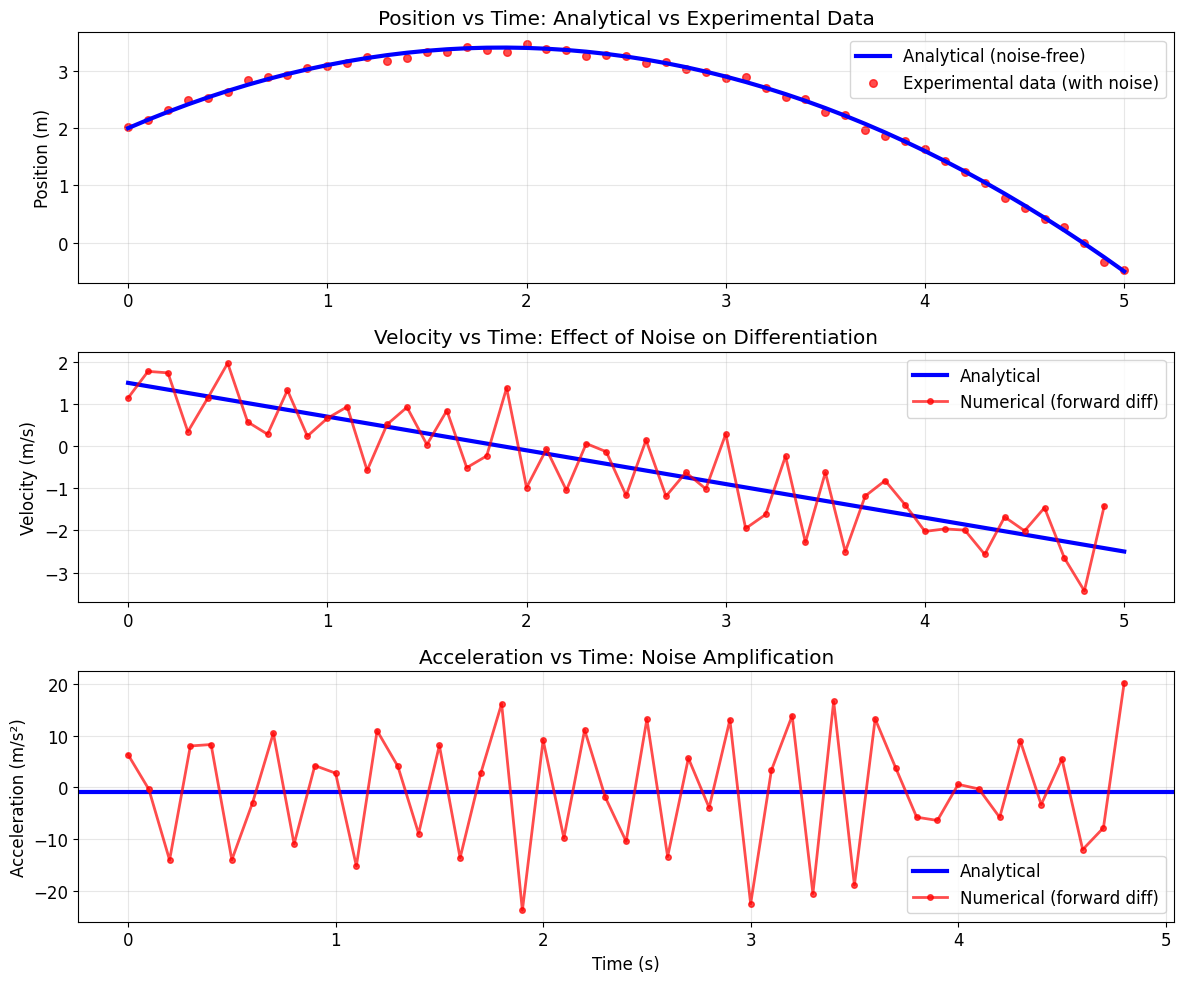

In [ ]:
# Demonstration: Analytical vs Numerical Differentiation
print("\n--- Demonstration: Forward Difference vs Analytical ---")

# Create test function: position as parabola (constant acceleration)
t_test = np.linspace(0, 5, 51)  # 51 points for smooth curve, in (s)
x0, v0, a = 2.0, 1.5, -0.8  # Initial position (m), velocity (m/s), acceleration (m/s^2)
position_analytical = x0 + v0*t_test + 0.5*a*t_test**2

# Analytical derivatives
velocity_analytical = v0 + a*t_test
acceleration_analytical = a * np.ones_like(t_test)  # np.ones_like(t_test) is an array of 1 one likes t_test, useful to multiply

# Add realistic noise to simulate experimental data
np.random.seed(42)  # For reproducible results
noise_level = 0.05  # 5cm noise in position measurement
position_noisy = position_analytical + noise_level * np.random.randn(len(t_test))

# Calculate numerical derivatives
t_vel, velocity_numerical = forward_difference(t_test, position_noisy)
t_acc, acceleration_numerical = forward_difference(t_vel, velocity_numerical)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Position plot
axes[0].plot(t_test, position_analytical, 'b-', label='Analytical (noise-free)', linewidth=3)
axes[0].scatter(t_test, position_noisy, c='red', s=30, alpha=0.7, label='Experimental data (with noise)')
axes[0].set_ylabel('Position (m)')
axes[0].set_title('Position vs Time: Analytical vs Experimental Data')
axes[0].legend()
axes[0].grid(True)

# Velocity plot
axes[1].plot(t_test, velocity_analytical, 'b-', label='Analytical', linewidth=3)
axes[1].plot(t_vel, velocity_numerical, 'ro-', markersize=4, label='Numerical (forward diff)', alpha=0.7)
axes[1].set_ylabel('Velocity (m/s)')
axes[1].set_title('Velocity vs Time: Effect of Noise on Differentiation')
axes[1].legend()
axes[1].grid(True)

# Acceleration plot
axes[2].axhline(y=acceleration_analytical[0], color='b', linewidth=3, label='Analytical')
axes[2].plot(t_acc, acceleration_numerical, 'ro-', markersize=4, label='Numerical (forward diff)', alpha=0.7)
axes[2].set_ylabel('Acceleration (m/s²)')
axes[2].set_xlabel('Time (s)')
axes[2].set_title('Acceleration vs Time: Noise Amplification')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()


OBSERVATIONS:
1. Position data with small noise (5cm) leads to significant velocity scatter
2. Second derivative (acceleration) shows extreme noise amplification
3. This demonstrates why differentiation requires careful treatment of experimental data

KEY INSIGHT: Differentiation amplifies noise! This is a fundamental challenge
in experimental physics and engineering.



--- Step Size Selection Analysis ---


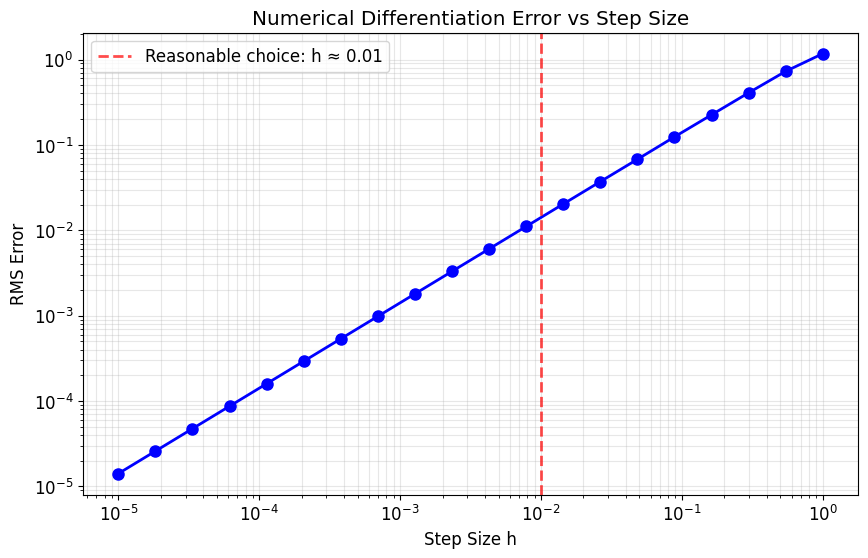

In [ ]:
# Step Size Analysis
print("\n--- Step Size Selection Analysis ---")

def analyze_step_size(func, func_deriv, x_range, step_sizes):
    """
    Analyze how step size affects numerical differentiation accuracy.
    """
    errors = []

    for h in step_sizes:
        # Create grid with specific step size
        x = np.arange(x_range[0], x_range[1] + h, h)
        y = func(x)

        # Calculate numerical derivative
        x_num, dy_num = forward_difference(x, y)

        # Analytical derivative at same points
        dy_analytical = func_deriv(x_num)

        # Calculate RMS error
        error = np.sqrt(np.mean((dy_num - dy_analytical)**2))
        errors.append(error)

    return errors

# Test function: sin(x) with known derivative cos(x)
test_func = lambda x: np.sin(2*x)
test_deriv = lambda x: 2*np.cos(2*x)

step_sizes = np.logspace(-5, 0, 20)  # From 0.001 to 1.0
errors = analyze_step_size(test_func, test_deriv, [0, np.pi], step_sizes)

plt.figure(figsize=(10, 6))
plt.loglog(step_sizes, errors, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Step Size h')
plt.ylabel('RMS Error')
plt.title('Numerical Differentiation Error vs Step Size')
plt.grid(True, which="both", alpha=0.3)
plt.axvline(x=0.01, color='r', linestyle='--', alpha=0.7, label='Reasonable choice: h ≈ 0.01')
plt.legend()
plt.show()




STEP SIZE SELECTION GUIDELINES:
1. Too large: Truncation error dominates (poor approximation)
2. Too small: Round-off error dominates (for noisy data)
3. Optimal choice: Balance between truncation and round-off errors
4. Rule of thumb: h ≈ 0.001 to 0.01 for typical physics problems

## CHECKPOINT 1 : Understanding Derivatives
🔍 CHECKPOINT 1: Test Your Understanding
Before moving on, make sure you understand:
1. Why does differentiation amplify noise?
2. What happens to accuracy as step size decreases?
3. How would you choose step size for real experimental data?

Try modifying the noise_level variable above and re-running the demonstration!




--- Physics Application: Analyzing Real Motion Data ---


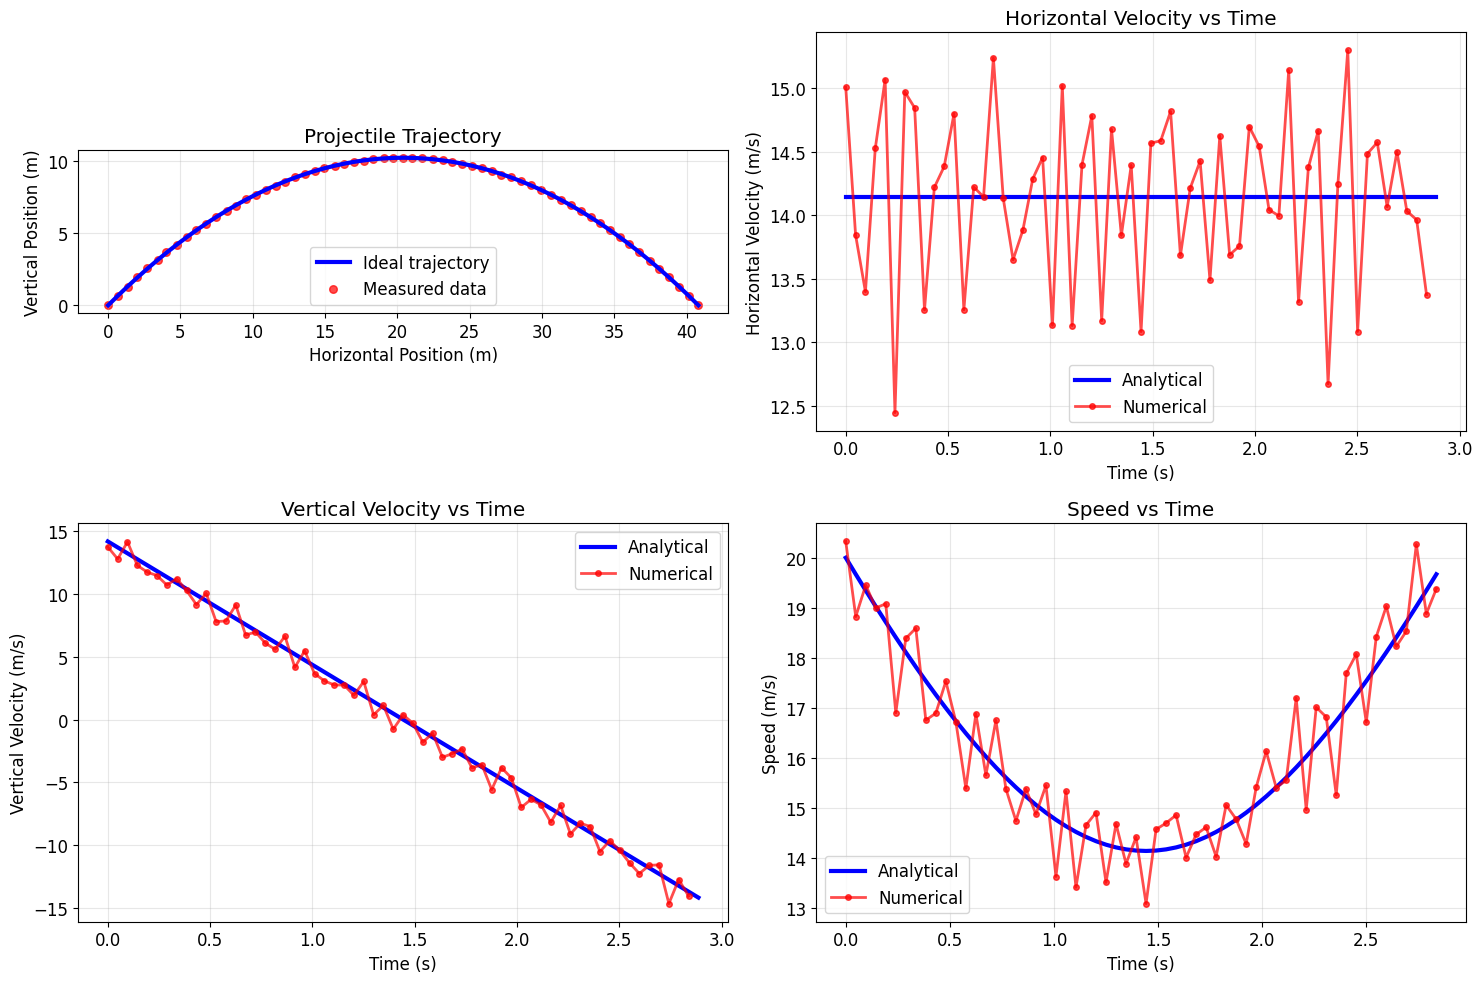

PHYSICS ANALYSIS RESULTS:
Initial horizontal velocity: 14.14 ± 0.66 m/s
Expected: 14.14 m/s
Initial vertical velocity: 13.71 m/s
Expected: 14.14 m/s
Estimated gravitational acceleration: 9.79 m/s²
Expected: 9.80 m/s²
Error: 0.1%


In [ ]:

# Physics Application: Kinematics Analysis
print("\n--- Physics Application: Analyzing Real Motion Data ---")

# Simulate realistic projectile motion data
def create_projectile_data():
    """Create realistic projectile motion data with measurement noise."""
    # Parameters
    v0 = 20.0  # m/s initial speed
    theta = 45.0 * np.pi/180  # launch angle
    g = 9.80  # m/s^2

    # Time points (typical video analysis: 30 fps)
    t_real = np.linspace(0, 2*v0*np.sin(theta)/g, 61)

    # Ideal trajectory
    x_ideal = v0 * np.cos(theta) * t_real
    y_ideal = v0 * np.sin(theta) * t_real - 0.5 * g * t_real**2

    # Add measurement uncertainty (typical for video analysis)
    np.random.seed(123)
    x_measured = x_ideal + 0.02 * np.random.randn(len(t_real))  # 2cm uncertainty
    y_measured = y_ideal + 0.02 * np.random.randn(len(t_real))

    return t_real, x_measured, y_measured, x_ideal, y_ideal

t, x_meas, y_meas, x_ideal, y_ideal = create_projectile_data()

# Calculate velocities using numerical differentiation
t_vel, vx_num = forward_difference(t, x_meas)
_, vy_num = forward_difference(t, y_meas)

# Analytical velocities for comparison
v0 = 20.0
theta = 45.0 * np.pi/180
g = 9.80
vx_analytical = v0 * np.cos(theta) * np.ones_like(t)
vy_analytical = v0 * np.sin(theta) - g * t

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Trajectory plot
axes[0, 0].plot(x_ideal, y_ideal, 'b-', linewidth=3, label='Ideal trajectory')
axes[0, 0].scatter(x_meas, y_meas, c='red', s=30, alpha=0.7, label='Measured data')
axes[0, 0].set_xlabel('Horizontal Position (m)')
axes[0, 0].set_ylabel('Vertical Position (m)')
axes[0, 0].set_title('Projectile Trajectory')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_aspect('equal')

# Horizontal velocity
axes[0, 1].plot(t, vx_analytical, 'b-', linewidth=3, label='Analytical')
axes[0, 1].plot(t_vel, vx_num, 'ro-', markersize=4, alpha=0.7, label='Numerical')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Horizontal Velocity (m/s)')
axes[0, 1].set_title('Horizontal Velocity vs Time')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Vertical velocity
axes[1, 0].plot(t, vy_analytical, 'b-', linewidth=3, label='Analytical')
axes[1, 0].plot(t_vel, vy_num, 'ro-', markersize=4, alpha=0.7, label='Numerical')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Vertical Velocity (m/s)')
axes[1, 0].set_title('Vertical Velocity vs Time')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Speed magnitude
speed_num = np.sqrt(vx_num**2 + vy_num**2)
speed_analytical = np.sqrt(vx_analytical[:-1]**2 + vy_analytical[:-1]**2)
axes[1, 1].plot(t_vel, speed_analytical, 'b-', linewidth=3, label='Analytical')
axes[1, 1].plot(t_vel, speed_num, 'ro-', markersize=4, alpha=0.7, label='Numerical')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Speed (m/s)')
axes[1, 1].set_title('Speed vs Time')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Calculate and display physics insights
print("PHYSICS ANALYSIS RESULTS:")
print(f"Initial horizontal velocity: {np.mean(vx_num):.2f} ± {np.std(vx_num):.2f} m/s")
print(f"Expected: {v0*np.cos(theta):.2f} m/s")
print(f"Initial vertical velocity: {vy_num[0]:.2f} m/s")
print(f"Expected: {v0*np.sin(theta):.2f} m/s")

# Estimate gravitational acceleration from vertical velocity slope
# Using linear regression on vy vs t
coeffs = np.polyfit(t_vel, vy_num, 1)
g_estimated = -coeffs[0]
print(f"Estimated gravitational acceleration: {g_estimated:.2f} m/s²")
print(f"Expected: {g:.2f} m/s²")
print(f"Error: {abs(g_estimated - g)/g * 100:.1f}%")
